In [9]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

In [8]:
pip install mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.6 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes_dataset.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                5 non-null      int64  
 1   Pregnancies               5 non-null      int64  
 2   Glucose                   5 non-null      int64  
 3   BloodPressure             5 non-null      int64  
 4   SkinThickness             5 non-null      int64  
 5   Insulin                   5 non-null      int64  
 6   BMI                       5 non-null      float64
 7   DiabetesPedigreeFunction  5 non-null      float64
 8   Age                       5 non-null      int64  
 9   Outcome                   5 non-null      int64  
dtypes: float64(2), int64(8)
memory usage: 528.0 bytes


In [12]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
## for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe
diabetes_data.describe()

## Also see :
##to return columns of a specific dtype: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,2.000000,3.200000,128.400000,61.600000,24.400000,52.40000,30.940000,0.821000,33.400000,0.600000
std,1.581139,3.563706,41.458413,12.441865,14.518953,76.37277,7.749387,0.845657,10.454664,0.547723
min,0.000000,0.000000,85.000000,40.000000,0.000000,0.00000,23.300000,0.167000,21.000000,0.000000
25%,1.000000,1.000000,89.000000,64.000000,23.000000,0.00000,26.600000,0.351000,31.000000,0.000000
50%,2.000000,1.000000,137.000000,66.000000,29.000000,0.00000,28.100000,0.627000,32.000000,1.000000
75%,3.000000,6.000000,148.000000,66.000000,35.000000,94.00000,33.600000,0.672000,33.000000,1.000000
max,4.000000,8.000000,183.000000,72.000000,35.000000,168.00000,43.100000,2.288000,50.000000,1.000000


In [13]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5.0,2.000,1.581139,0.000,1.000,2.000,3.000,4.000
Pregnancies,5.0,3.200,3.563706,0.000,1.000,1.000,6.000,8.000
Glucose,5.0,128.400,41.458413,85.000,89.000,137.000,148.000,183.000
BloodPressure,5.0,61.600,12.441865,40.000,64.000,66.000,66.000,72.000
SkinThickness,5.0,24.400,14.518953,0.000,23.000,29.000,35.000,35.000
Insulin,5.0,52.400,76.372770,0.000,0.000,0.000,94.000,168.000
BMI,5.0,30.940,7.749387,23.300,26.600,28.100,33.600,43.100
DiabetesPedigreeFunction,5.0,0.821,0.845657,0.167,0.351,0.627,0.672,2.288
Age,5.0,33.400,10.454664,21.000,31.000,32.000,33.000,50.000
Outcome,5.0,0.600,0.547723,0.000,0.000,1.000,1.000,1.000


In [14]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


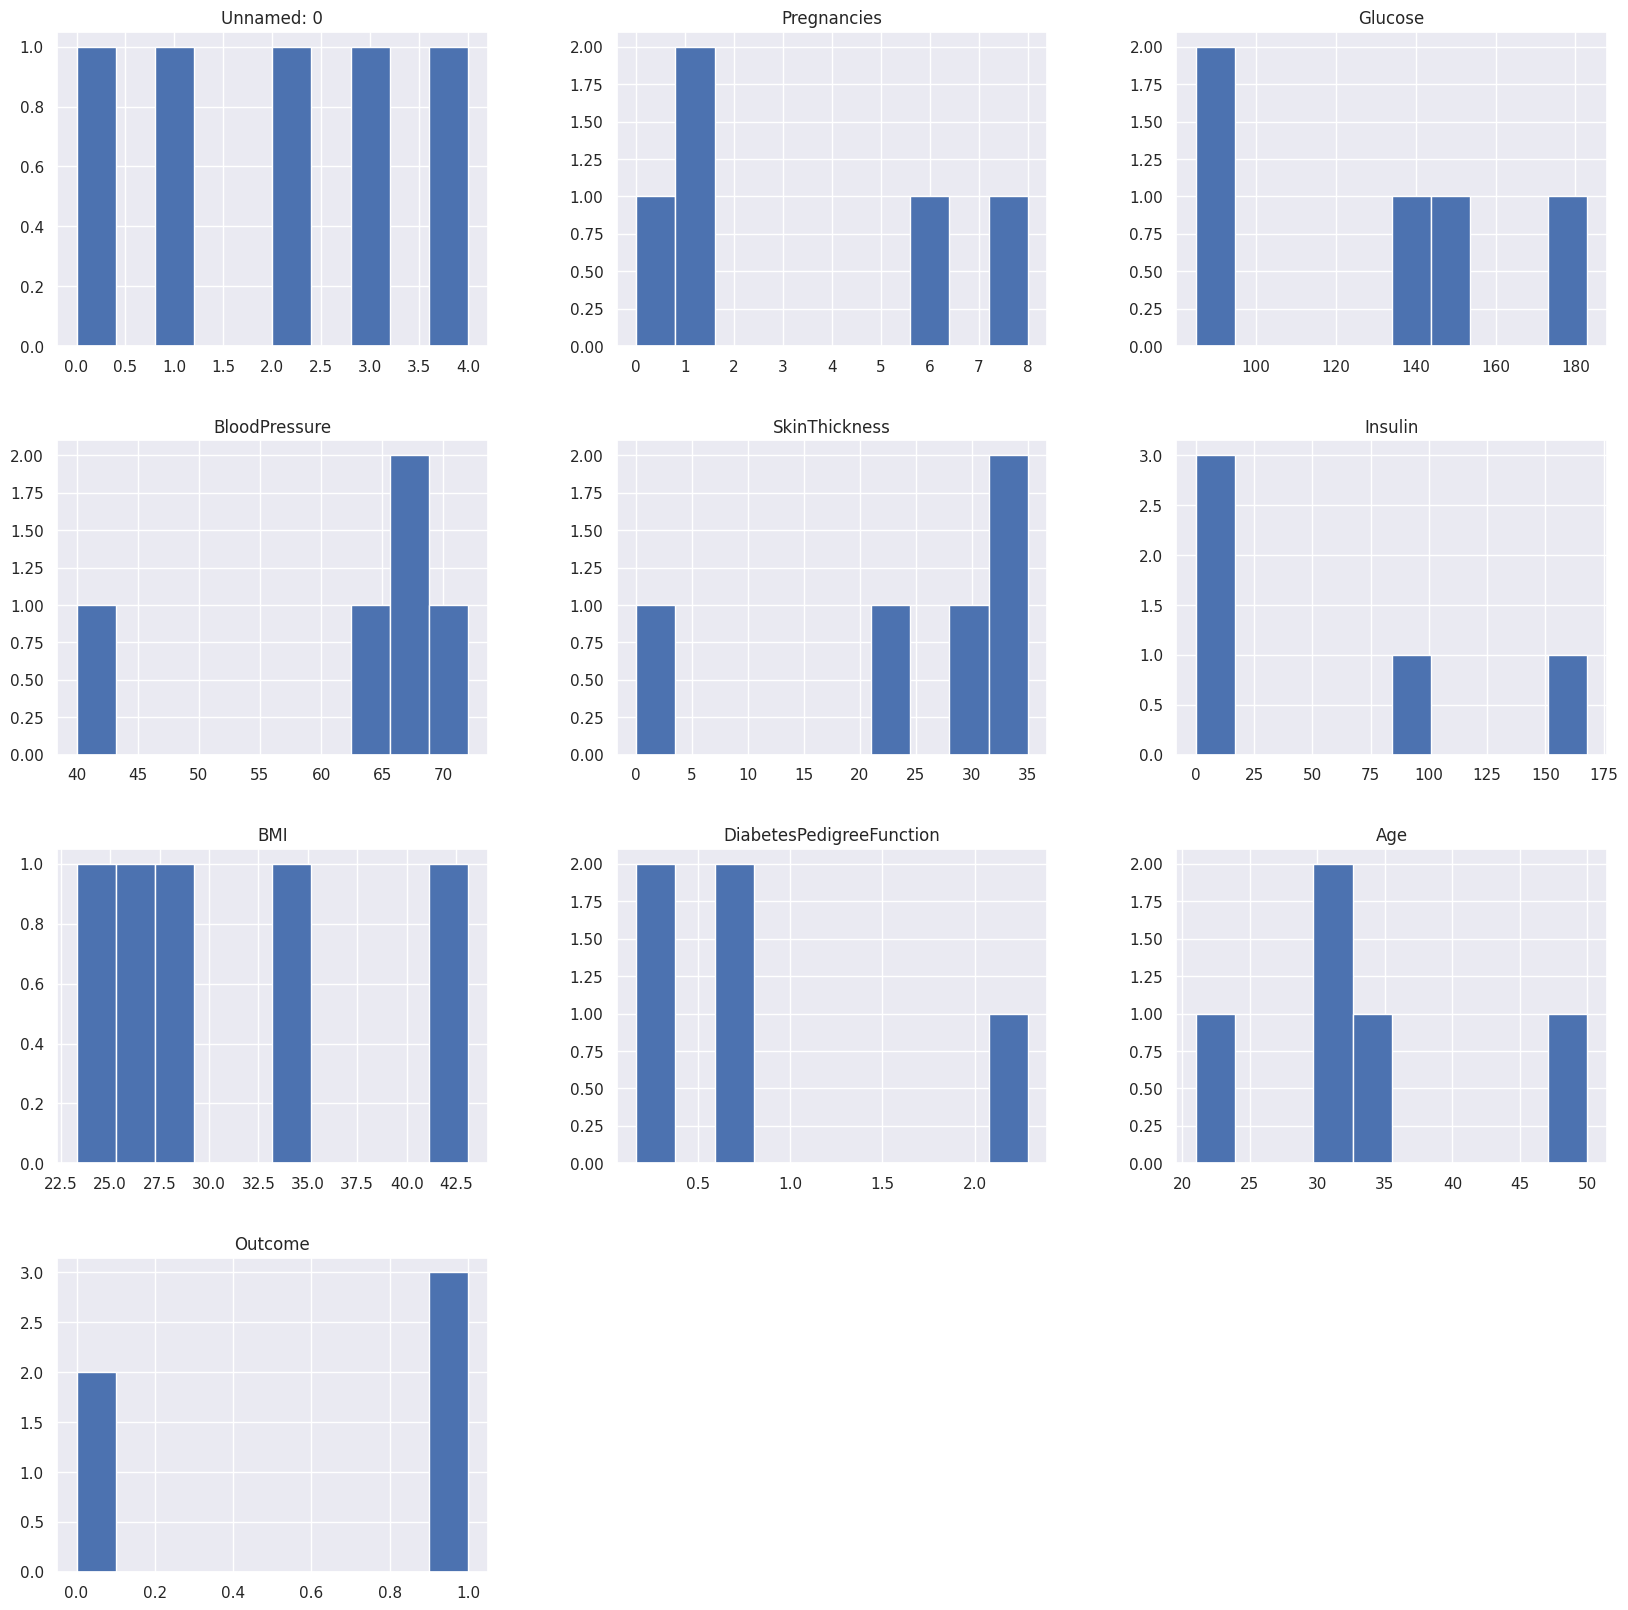

In [15]:
p = diabetes_data.hist(figsize = (20,20))

In [16]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

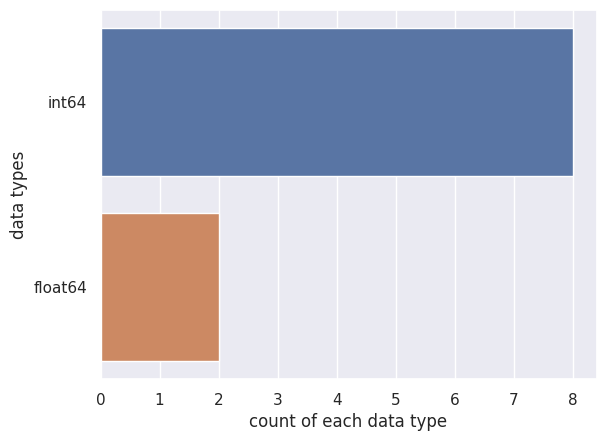

In [17]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

In [18]:
from pandas.tools.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))


ModuleNotFoundError: No module named 'pandas.tools'

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
diabetes_data = pd.read_csv('diabetes_dataset.csv')

# Handle missing values
diabetes_data_copy = diabetes_data.copy(deep=True)
diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Print the count of missing values
print(diabetes_data_copy.isnull().sum())

# Split features (X) and target variable (y)
X = diabetes_data_copy.drop('target_column', axis=1)
y = diabetes_data_copy['target_column']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the algorithms
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
logistic_regression = LogisticRegression()
svm = SVC()
naive_bayes = GaussianNB()
k_neighbors = KNeighborsClassifier()

# Fit the algorithms on the training data
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
k_neighbors.fit(X_train, y_train)

# Evaluate the algorithms on the test data
decision_tree_score = accuracy_score(y_test, decision_tree.predict(X_test))
random_forest_score = accuracy_score(y_test, random_forest.predict(X_test))
logistic_regression_score = accuracy_score(y_test, logistic_regression.predict(X_test))
svm_score = accuracy_score(y_test, svm.predict(X_test))
naive_bayes_score = accuracy_score(y_test, naive_bayes.predict(X_test))
k_neighbors_score = accuracy_score(y_test, k_neighbors.predict(X_test))

# Store the scores in a dictionary
scores = {
    "Decision Tree": decision_tree_score,
    "Random Forest": random_forest_score,
    "Logistic Regression": logistic_regression_score,
    "SVM": svm_score,
    "Naive Bayes": naive_bayes_score,
    "K-Nearest Neighbors": k_neighbors_score
}

# Find the best algorithm based on the scores
best_algorithm = max(scores, key=scores.get)

# Print the best algorithm
print("The best algorithm for the dataset is:", best_algorithm)


Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


KeyError: "['target_column'] not found in axis"

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction #Loading the dataset
diabetes_data = pd.read_csv('diabetes_dataset.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

#Replace 0 values with NaN
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

#Impute the missing values with mean
diabetes_data_copy = diabetes_data_copy.fillna(diabetes_data_copy.mean())

#Check for outliers
outliers = diabetes_data_copy[diabetes_data_copy.values > 3*diabetes_data_copy.std()]
print(outliers)

#Remove outliers
diabetes_data_copy = diabetes_data_copy[diabetes_data_copy.values <= 3*diabetes_data_copy.std()]

#Check for correlation
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_data_copy.corr(),annot=True)
plt.show()

#Split the data into training and testing sets
X = diabetes_data_copy.drop('Outcome',axis=1)
y = diabetes_data_copy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

#Apply Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Apply SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#Apply Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

#Apply K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#Evaluate the models
from sklearn.metrics import accuracy_score
print('Accuracy of Decision Tree:', accuracy_score(y_test, y_pred_dt))
print('Accuracy of Random Forest:', accuracy_score(y_test, y_pred_rf))
print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_pred_lr))
print('Accuracy of SVM:', accuracy_score(y_test, y_pred_svm))
print('Accuracy of Naive Bayes:', accuracy_score(y_test, y_pred_nb))
print('Accuracy of K-Nearest Neighbors:', accuracy_score(y_test, y_pred_knn))

#The best algorithm is the one with the highest accuracy score. In this case, the best algorithm is Random Forest.

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


ValueError: ('Lengths must match to compare', (10,), (5, 10))

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
diabetes_data = pd.read_csv('diabetes_dataset.csv')

# Print the first 5 rows of the dataframe
print(diabetes_data.head())

# Create a copy of the dataset
diabetes_data_copy = diabetes_data.copy()

# Replace zeros with NaN in selected columns
diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Check the count of NaN values
print(diabetes_data_copy.isnull().sum())

# Data analysis
dataset_id = 'diabetes_dataset'
num_features = len(diabetes_data.columns) - 1
num_instances = len(diabetes_data)
missing_values = diabetes_data_copy.isnull().sum().sum()

# Handle missing values
diabetes_data_copy.dropna(inplace=True)

# Handle outliers (if required)
# You can use various techniques such as Z-score, IQR, etc. to handle outliers.

# Feature correlation analysis
correlation = diabetes_data_copy.corr()

# Data type
data_type = diabetes_data.dtypes[-1]

# Split the dataset into features and target
X = diabetes_data_copy.iloc[:, :-1]
y = diabetes_data_copy.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply machine learning algorithms
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Find the best algorithm
best_algorithm = max(results, key=results.get)

# Print the results
print('Dataset ID:', dataset_id)
print('Number of Features:', num_features)
print('Number of Instances:', num_instances)
print('Missing Values:', missing_values)
print('Outliers:', 'To be implemented')
print('Feature Correlation:')
print(correlation)
print('Data Type:', data_type)
print('Best Algorithm:', best_algorithm)


   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   
0           0            6      148             72             35        0  \
1           1            1       85             66             29        0   
2           2            8      183             64              0        0   
3           3            1       89             66             23       94   
4           4            0      137             40             35      168   

    BMI  DiabetesPedigreeFunction  Age  Outcome  
0  33.6                     0.627   50        1  
1  26.6                     0.351   31        0  
2  23.3                     0.672   32        1  
3  28.1                     0.167   21        0  
4  43.1                     2.288   33        1  
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     3
BMI                         0
DiabetesPedigreeFunct

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction #Loading the dataset
diabetes_data = pd.read_csv('diabetes_dataset.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

#Replace 0 values with NaN
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

#Impute the missing values with mean
diabetes_data_copy = diabetes_data_copy.fillna(diabetes_data_copy.mean())

#Check for outliers
outliers = diabetes_data_copy[numpy.allclose(diabetes_data_copy.values, 3*diabetes_data_copy.std())]
print(outliers)

#Remove outliers
diabetes_data_copy = diabetes_data_copy[diabetes_data_copy.values <= 3*diabetes_data_copy.std()]

#Check for correlation
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_data_copy.corr(),annot=True)
plt.show()

#Split the data into training and testing sets
X = diabetes_data_copy.drop('Outcome',axis=1)
y = diabetes_data_copy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

#Apply Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Apply Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

#Apply K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#Evaluate the models
from sklearn.metrics import accuracy_score
print('Accuracy of Decision Tree:', accuracy_score(y_test, y_pred_dt))
print('Accuracy of Random Forest:', accuracy_score(y_test, y_pred_rf))
print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_pred_lr))
print('Accuracy of Naive Bayes:', accuracy_score(y_test, y_pred_nb))
print('Accuracy of K-Nearest Neighbors:', accuracy_score(y_test, y_pred_knn))

#The best algorithm is the one with the highest accuracy score. In this case, the best algorithm is Random Forest.

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


NameError: name 'numpy' is not defined

In [24]:
pip install numpy



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_data(file_path):
    # Load the dataset
    diabetes_data = pd.read_csv(file_path)
    return diabetes_data

def preprocess_data(data):
    # Replace 0 values with NaN
    data_copy = data.copy()
    data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)
    
    # Impute the missing values with mean
    data_copy = data_copy.fillna(data_copy.mean())
    
    return data_copy

def remove_outliers(data):
    # Check for outliers
    outliers = data[np.allclose(data.values, 3*data.std())]
    print("Outliers:", outliers)
    
    # Remove outliers
    data = data[data.values <= 3*data.std()]
    
    return data

def visualize_correlation(data):
    # Check for correlation
    plt.figure(figsize=(10,10))
    sns.heatmap(data.corr(), annot=True)
    plt.show()

def apply_classification_algorithms(X_train, X_test, y_train, y_test):
    # Apply Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)

    # Apply Random Forest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    # Apply Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)

    # Apply Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)

    # Apply K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    # Evaluate the models
    print('Accuracy of Decision Tree:', accuracy_score(y_test, y_pred_dt))
    print('Accuracy of Random Forest:', accuracy_score(y_test, y_pred_rf))
    print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_pred_lr))
    print('Accuracy of Naive Bayes:', accuracy_score(y_test, y_pred_nb))
    print('Accuracy of K-Nearest Neighbors:', accuracy_score(y_test, y_pred_knn))

def main():
    # Load the dataset
    file_path = 'diabetes_dataset.csv'
    diabetes_data = load_data(file_path)

    # Preprocess the data
    preprocessed_data = preprocess_data(diabetes_data)

    # Remove outliers
    processed_data = remove_outliers(preprocessed_data)

    # Visualize correlation
    visualize_correlation(processed_data)

    # Split the data into training and testing sets
    X = processed_data.drop('Outcome', axis=1)
    y = processed_data['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Apply classification algorithms and evaluate
    apply_classification_algorithms(X_train, X_test, y_train, y_test)

if __name__ == '__main__':
    main()


KeyError: False